<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-8 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> Neural Networks in Finance </h2> </html>

### Silver: 6-months-2023 dataset
### LSTM (Long Short-Term Memory)
     
### Predictions of The Highest & Lowest prices DURING 25 following minutes
- Early-Stopping
- Loss function: MSE

### length of analysed history (sliding window)- 50 rows ~ 4 hours ago

#### dataset for training: 35.220 rows (5-minutes) = 6 months
#### train / test = 90 /10

_____________________![image.png](attachment:3c2be342-edd3-4b1a-be86-386ca3bc89e1.png)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import *
import seaborn as sns

___________________![image.png](attachment:1ac70cfb-0de8-4f0f-96b9-a9036e865d16.png)

In [8]:
import tensorflow as tf
from tensorflow import keras

import tensorflow as tf
from tensorflow import keras

_____________________![image.png](attachment:bf9e6bfb-f12d-4987-a70f-1f020983c1da.png)

In [11]:
print(tf.__version__)

2.18.0


________________________![image.png](attachment:403bd3ea-d243-4143-9216-25a23e53dce2.png)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
np.random.seed(19)

<html> <h3 style="font-style:italic; color:blue;"> Data</h3> </html>

In [15]:
# A preprocessed and normalised dataset is used.
# The dataset includes indicators for the start of the day and the start of the week.

# We use different normalisation principles for prices. All Silver prices are divided by 10.
# We use the typical normalisation principle for Volumes and Deltas.

# For normalisation, it is not necessary for the normalised columns' values to be in the range between [0,1].
# What is more important is that all the values in these columns are approximately the same order of magnitude,
# i.e. do not differ by hundreds or more times.

_______________________![image.png](attachment:81fe8f1f-9cc4-48a0-bcdf-fd096abf3871.png)

In [17]:
data=pd.read_csv('Silver_6m_2023_normalised_NEW-10.csv',low_memory=False,sep=',')
data.head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid,Y_Low_Ask
0,2.4036,2.4059,2.4017,2.4059,0.000952,2.4102,2.4125,2.4083,2.4125,0.000960,0.133180,0.000009,0.840686,0.840686,0.840686,0.840686,1,1,2.4059,2.4083
1,2.4064,2.4130,2.4064,2.4092,0.005048,2.4094,2.4188,2.4094,2.4141,0.003159,0.131287,0.002175,0.928922,0.860294,0.928922,0.882353,0,0,2.4130,2.4094
2,2.4094,2.4098,2.3972,2.3977,0.002470,2.4143,2.4148,2.4022,2.4027,0.002412,0.133115,0.000066,0.882353,0.879902,0.879902,0.879902,0,0,2.4098,2.4022
3,2.3977,2.3980,2.3938,2.3980,0.002445,2.4026,2.4028,2.3986,2.4028,0.002445,0.133172,0.000000,0.882353,0.884804,0.884804,0.884804,0,0,2.3980,2.3986
4,2.3978,2.4024,2.3976,2.4023,0.002429,2.4026,2.4073,2.4023,2.4073,0.002474,0.133217,0.000052,0.884804,0.882353,0.887255,0.879902,0,0,2.4024,2.4023


_________________________![image.png](attachment:0249d3b8-764d-481e-95d7-7ec3ad9ba1ce.png)

In [19]:
data.tail()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid,Y_Low_Ask
35215,2.2752,2.2752,2.2741,2.2746,0.000753,2.2782,2.2782,2.2771,2.2776,0.004924,0.137334,0.004802,0.928922,0.928922,0.928922,0.928922,0,0,2.2752,2.2771
35216,2.2736,2.2751,2.2736,2.2746,0.000386,2.2775,2.2781,2.2775,2.2776,0.002070,0.134853,0.001939,0.906863,0.928922,0.906863,0.928922,0,0,2.2751,2.2775
35217,2.2751,2.2751,2.2746,2.2746,0.000189,2.2781,2.2781,2.2776,2.2776,0.001152,0.134133,0.001109,0.928922,0.928922,0.928922,0.928922,0,0,2.2751,2.2776
35218,2.2746,2.2761,2.2736,2.2756,0.000591,2.2776,2.2797,2.2774,2.2786,0.001870,0.134448,0.001472,0.928922,0.914216,0.909314,0.928922,0,0,2.2761,2.2774
35219,2.2756,2.2766,2.2701,2.2745,0.000894,2.2786,2.2811,2.2786,2.2811,0.001015,0.133293,0.000139,0.928922,0.892157,0.794118,0.840686,0,0,2.2766,2.2786


____________________![image.png](attachment:f2355030-56c4-49bd-ad45-64f72c0e4a13.png)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35220 non-null  float64
 1   High_Bid          35220 non-null  float64
 2   Low_Bid           35220 non-null  float64
 3   Close_Bid         35220 non-null  float64
 4   Volume_Bid        35220 non-null  float64
 5   Open_Ask          35220 non-null  float64
 6   High_Ask          35220 non-null  float64
 7   Low_Ask           35220 non-null  float64
 8   Close_Ask         35220 non-null  float64
 9   Volume_Ask        35220 non-null  float64
 10  Volume_Delta      35220 non-null  float64
 11  Volume_Delta_abs  35220 non-null  float64
 12  Open_Delta        35220 non-null  float64
 13  High_Delta        35220 non-null  float64
 14  Low_Delta         35220 non-null  float64
 15  Close_Delta       35220 non-null  float64
 16  New_day           35220 non-null  int64 

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [23]:
# memory size reduction

columns_float =['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid',
                'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask',
                'Volume_Delta', 'Volume_Delta_abs',
                'Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta',
                'Y_High_Bid', 'Y_Low_Ask']

columns_integer =['New_day', 'New_week']



_________________________![image.png](attachment:c0f8d1c2-9119-4617-b120-858be9c1f345.png)

In [25]:
for column in columns_float:
    data[column]=pd.to_numeric(data[column],downcast='float')
for column in columns_integer:
    data[column]=pd.to_numeric(data[column],downcast='integer')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35220 non-null  float32
 1   High_Bid          35220 non-null  float32
 2   Low_Bid           35220 non-null  float32
 3   Close_Bid         35220 non-null  float32
 4   Volume_Bid        35220 non-null  float32
 5   Open_Ask          35220 non-null  float32
 6   High_Ask          35220 non-null  float32
 7   Low_Ask           35220 non-null  float32
 8   Close_Ask         35220 non-null  float32
 9   Volume_Ask        35220 non-null  float32
 10  Volume_Delta      35220 non-null  float32
 11  Volume_Delta_abs  35220 non-null  float32
 12  Open_Delta        35220 non-null  float32
 13  High_Delta        35220 non-null  float32
 14  Low_Delta         35220 non-null  float32
 15  Close_Delta       35220 non-null  float32
 16  New_day           35220 non-null  int8  

__________________________![image.png](attachment:edb9fcb4-3353-4009-9a00-204a6a3cd66c.png)

In [27]:
data.describe()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid,Y_Low_Ask
count,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,3.522000e+04,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000
mean,2.335737,2.337461,2.333843,2.335737,0.022654,2.338758,2.340482,2.336870,2.338750,0.095985,0.206354,0.084729,0.928403,0.928402,9.282691e-01,0.928593,0.003634,0.000738,2.337461,2.336870
std,0.136878,0.136883,0.136893,0.136887,0.024550,0.136878,0.136879,0.136895,0.136886,0.106733,0.091225,0.104995,0.007956,0.008288,1.229153e-02,0.009445,0.060176,0.027161,0.136883,0.136895
min,1.989300,1.991400,1.988800,1.989300,0.000000,1.992300,1.994400,1.991800,1.992300,0.000000,0.000000,0.000000,0.549020,0.458333,2.585078e-15,0.245098,0.000000,0.000000,1.991400,1.991800
25%,2.242175,2.244000,2.240000,2.242100,0.007141,2.245200,2.247000,2.243000,2.245100,0.025894,0.147285,0.016490,0.928922,0.928922,9.289216e-01,0.928922,0.000000,0.000000,2.244000,2.243000
50%,2.356000,2.357600,2.354300,2.356000,0.014580,2.359000,2.360700,2.357300,2.359000,0.060819,0.173862,0.047034,0.928922,0.928922,9.289216e-01,0.928922,0.000000,0.000000,2.357600,2.357300
75%,2.412200,2.414400,2.410300,2.412200,0.029227,2.415300,2.417400,2.413300,2.415200,0.127558,0.231854,0.113856,0.928922,0.928922,9.289216e-01,0.928922,0.000000,0.000000,2.414400,2.413300
max,2.611800,2.612300,2.609800,2.611800,0.329981,2.614800,2.615300,2.612800,2.614800,1.000000,1.000000,1.000000,0.975490,0.958333,1.000000e+00,0.973039,1.000000,1.000000,2.612300,2.612800


________________________![image.png](attachment:d6be8a47-2bfd-48a8-8094-a1d0704a9519.png)

In [29]:
data.shape

(35220, 20)

<html> <h3 style="font-style:italic; color:blue;"> Data Visualisation </h3> </html>

____________________![image.png](attachment:3a712fce-a669-403a-b7a6-54a65d7117c1.png)

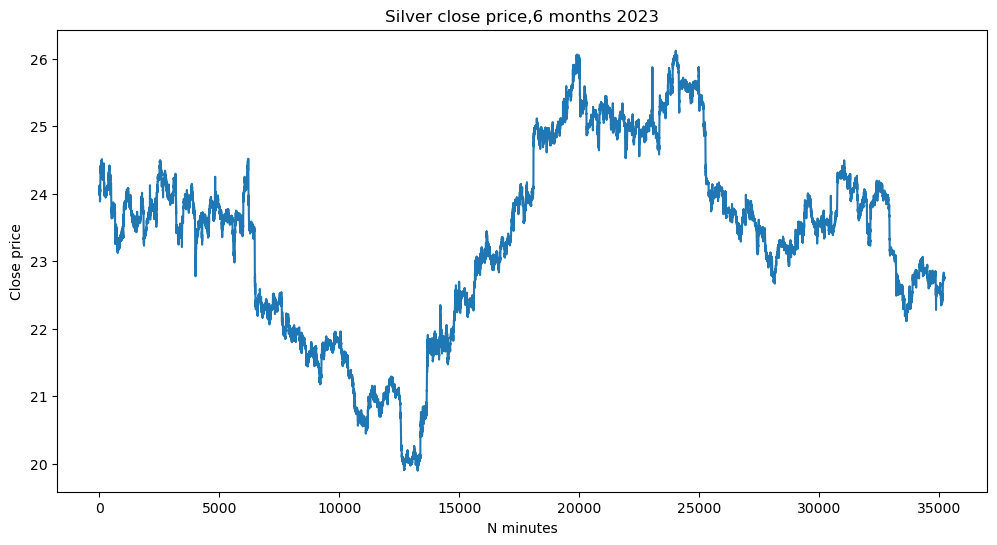

In [32]:
plt.figure(figsize=(12,6))
plt.plot(data['Close_Bid']*10)
plt.title('Silver close price,6 months 2023')
plt.xlabel('N minutes')
plt.ylabel('Close price')
plt.show()

__________________________![image.png](attachment:2cc199a5-7937-48cf-a78a-7d1e800dd6b2.png)

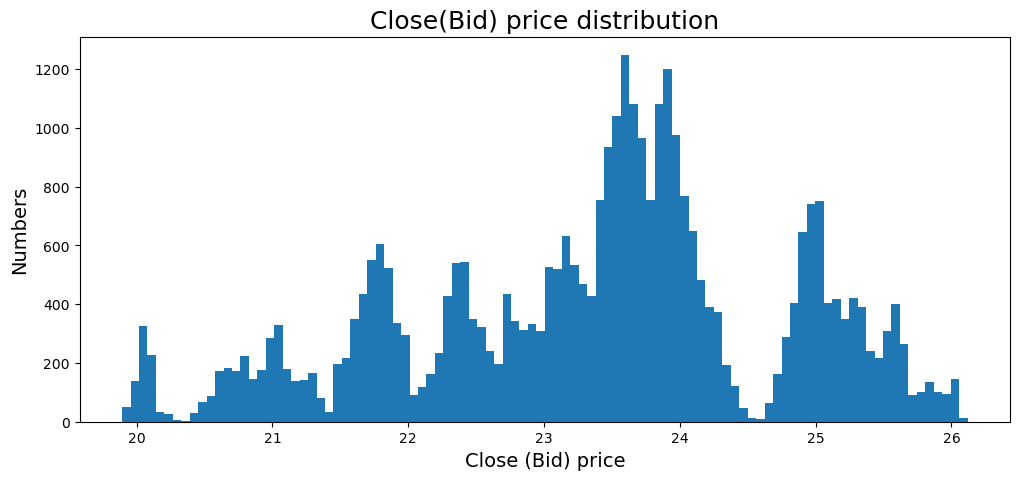

In [34]:
plt.figure(num=1,figsize=(12,5))
plt.hist(data['Close_Bid']*10,bins=100)
plt.title('Close(Bid) price distribution',size=18)
plt.xlabel('Close (Bid) price',size=14)
plt.ylabel('Numbers',size=14)
plt.show();

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

<Figure size 1200x500 with 0 Axes>

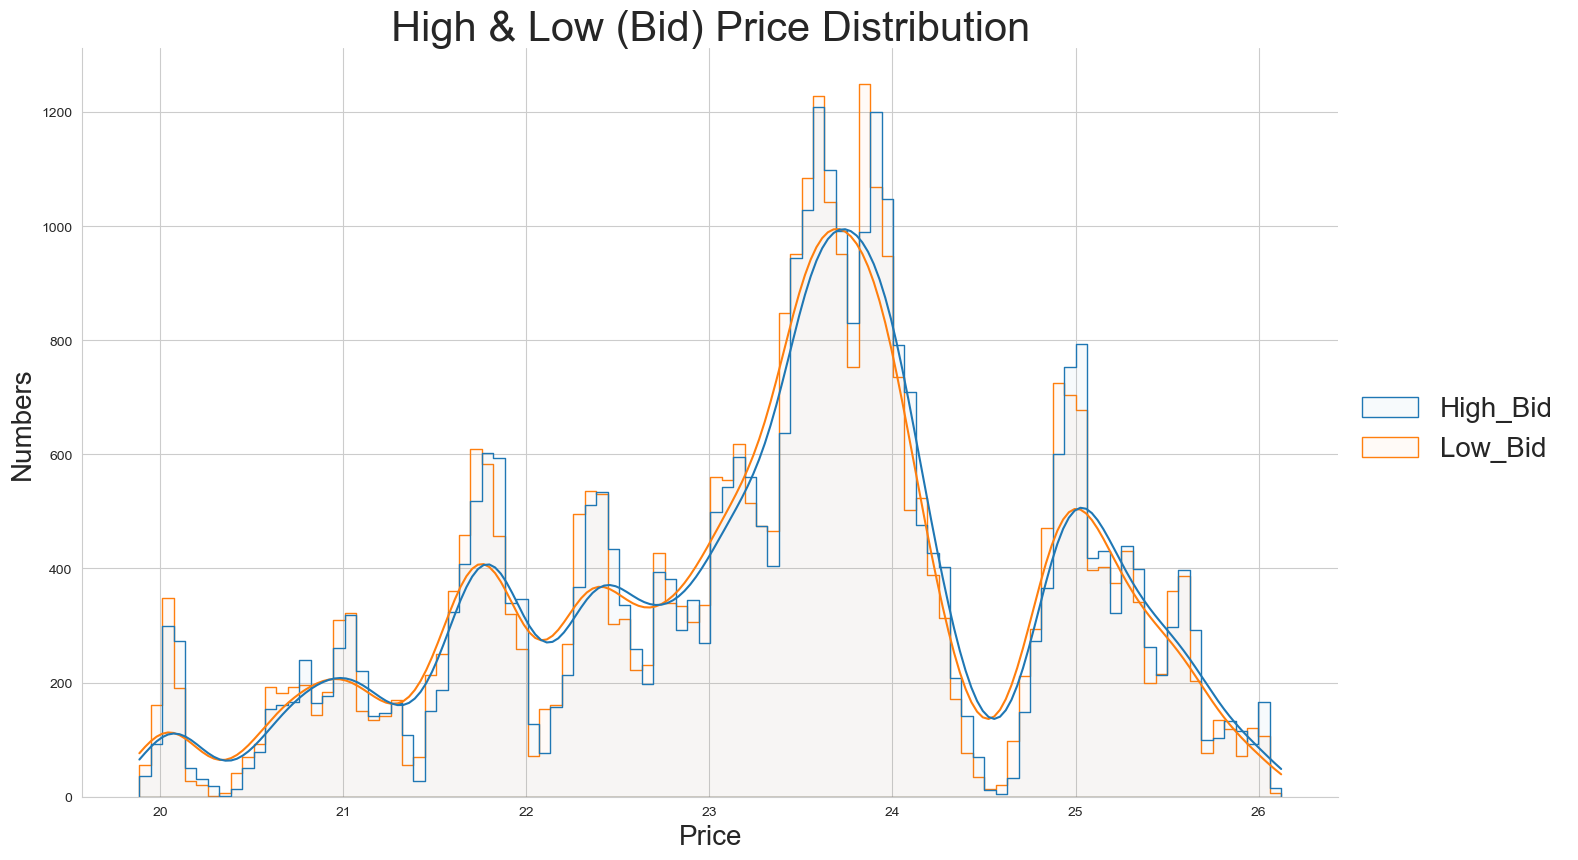

In [36]:
fig = plt.figure(figsize=(12, 5))
plt.rc('axes', titlesize= 30 )
sns.set_style('whitegrid')
sns.set_context(rc={'legend.fontsize': 20.0})

sns.displot(
            data[['High_Bid', 'Low_Bid']]*10,
            height=8,
            aspect=1.7,
            #hue="species",
            kde=True,
            element="step",
            bins=100,
            alpha=0.03,

)

plt.title('High & Low (Bid) Price Distribution')
plt.xlabel('Price', size= 20)
#plt.ylabel('count (%)')
plt.ylabel('Numbers', size= 20)
plt.show();

__________________________![image.png](attachment:a2f9a895-1a3d-466c-a713-d71969c76483.png)

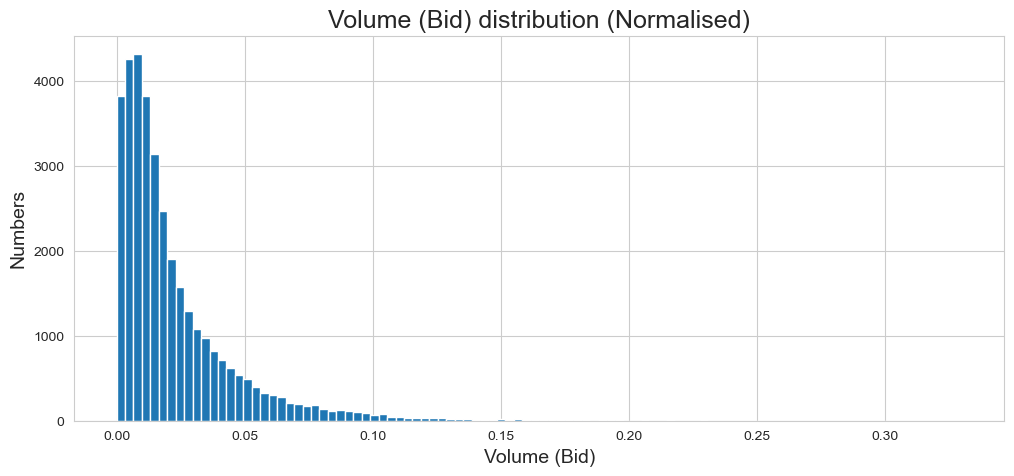

In [38]:
plt.figure(num=1,figsize=(12,5))
plt.hist(data['Volume_Bid'],bins=100)
plt.title('Volume (Bid) distribution (Normalised)',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume (Bid)',size=14)
plt.show();

_____________________________![image.png](attachment:12bce36a-a757-4dc4-ae6e-2f6c180f761a.png)

<Figure size 1200x500 with 0 Axes>

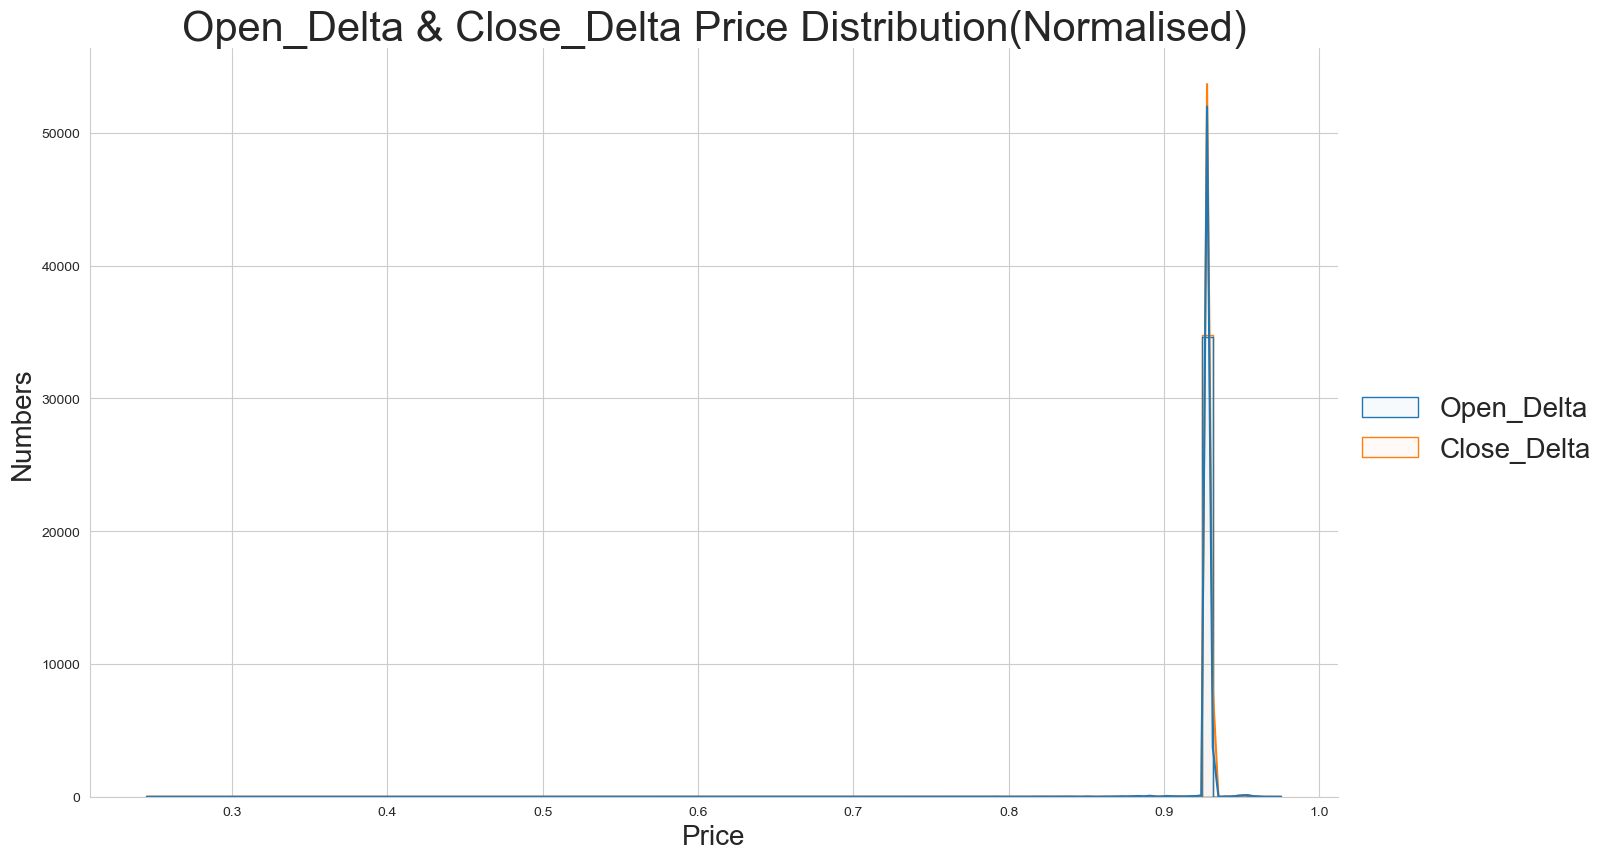

In [40]:
# Hint: To avoid typing the following code from scratch,
# you can copy the similar code above and modify it slightly.
fig = plt.figure(figsize=(12, 5))
plt.rc('axes', titlesize= 30 )
sns.set_style('whitegrid')
sns.set_context(rc={'legend.fontsize': 20.0})

sns.displot(
            data[['Open_Delta', 'Close_Delta']],
            height=8,
            aspect=1.7,
            #hue="species",
            kde=True,
            element="step",
            bins=100,
            alpha=0.03,

)

plt.title('Open_Delta & Close_Delta Price Distribution(Normalised)')
plt.xlabel('Price', size= 20)
#plt.ylabel('count (%)')
plt.ylabel('Numbers', size= 20)
plt.show();

<html> <h3 style="font-style:italic; color:blue;">Date transformation </h3> </html>


In [42]:
# We will predict the Highest and Lowest prices DURING the next 25 minutes (5rows * 5-minute time-frame).

# To do this in the data output (vector of answers), we shift prices sequentially to 25 minutes up (5rows),
# and find max and min prices during these 25 minutes
# Then you need to delete the 5 last rows since there are no prices for the next 25 minutes.
# Therefore, we will create an array of answers "data_ay" with the Highest and Lowest prices shifted sequentially to 5 rows up.

________________![image.png](attachment:2a9c8ffa-fa10-41a4-8429-54912b6dc2b1.png)

In [44]:
n=data.shape[0]
n

35220

________________![image.png](attachment:d5c1ae8c-6b92-4966-b2c8-9df405b2fda6.png)

In [46]:
p=data.shape[1]
p

20

__________________________![image.png](attachment:c36e4924-4e87-44b5-bbc7-49aa8e34278e.png)

In [48]:
data_ax=data.drop(['Y_High_Bid','Y_Low_Ask'],axis=1)

___________________![image.png](attachment:0b147115-c247-44e0-9bd7-613e4dbadee3.png)

In [50]:
data_ax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35220 non-null  float32
 1   High_Bid          35220 non-null  float32
 2   Low_Bid           35220 non-null  float32
 3   Close_Bid         35220 non-null  float32
 4   Volume_Bid        35220 non-null  float32
 5   Open_Ask          35220 non-null  float32
 6   High_Ask          35220 non-null  float32
 7   Low_Ask           35220 non-null  float32
 8   Close_Ask         35220 non-null  float32
 9   Volume_Ask        35220 non-null  float32
 10  Volume_Delta      35220 non-null  float32
 11  Volume_Delta_abs  35220 non-null  float32
 12  Open_Delta        35220 non-null  float32
 13  High_Delta        35220 non-null  float32
 14  Low_Delta         35220 non-null  float32
 15  Close_Delta       35220 non-null  float32
 16  New_day           35220 non-null  int8  

_______________________![image.png](attachment:51d737d1-606b-4909-9897-4b8361baf8ad.png)

In [52]:
data_ax.shape

(35220, 18)

____________________![image.png](attachment:0c1af6d8-caf4-41ff-a379-0b04bc31d76a.png)

In [54]:
data_ay=data[['Y_High_Bid','Y_Low_Ask']]

_______________________![image.png](attachment:d8472011-cff7-4733-abcc-962f26df7aaa.png)

In [56]:
data_ay.shape

(35220, 2)

_________________________![image.png](attachment:9b68ca6a-117d-4a07-851f-6a34c089ad93.png)

In [58]:
data_ay.head(6)

,Y_High_Bid,Y_Low_Ask
0,2.4059,2.4083
1,2.4130,2.4094
2,2.4098,2.4022
3,2.3980,2.3986
4,2.4024,2.4023
5,2.4061,2.4073


_____________________________![image.png](attachment:69cb95d3-a271-4e45-a0e8-2cba04a808dc.png)

In [60]:
data_ay.tail(10)

,Y_High_Bid,Y_Low_Ask
35210,2.2760,2.2772
35211,2.2753,2.2768
35212,2.2753,2.2768
35213,2.2747,2.2758
35214,2.2752,2.2769
35215,2.2752,2.2771
35216,2.2751,2.2775
35217,2.2751,2.2776
35218,2.2761,2.2774
35219,2.2766,2.2786


<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [62]:
# shift by one 5-minute(row) up
# We have to exclude the min and max prices of the current 5-minute row while further
# finding the min and max prices DURING the next 25 minutes

data_ay = data_ay.shift(-1)

_______________________![image.png](attachment:29e41a66-d339-4ade-9ea4-134099a9cf98.png)

In [64]:
data_ay.head(6)

,Y_High_Bid,Y_Low_Ask
0,2.4130,2.4094
1,2.4098,2.4022
2,2.3980,2.3986
3,2.4024,2.4023
4,2.4061,2.4073
5,2.4101,2.4090


_____________________![image.png](attachment:09ac21d9-9d8b-4a6a-bad9-5cb60ec9b080.png)

In [66]:
data_ay.tail(10)

,Y_High_Bid,Y_Low_Ask
35210,2.2753,2.2768
35211,2.2753,2.2768
35212,2.2747,2.2758
35213,2.2752,2.2769
35214,2.2752,2.2771
35215,2.2751,2.2775
35216,2.2751,2.2776
35217,2.2761,2.2774
35218,2.2766,2.2786
35219,NaN,NaN


<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [68]:
# create new colomns: MIN_Lowest(Low_Ask) and MAX_Highest(High_Bid) prices of DURING NEXT 25 minutes

# Forward-looking window
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=5)

data_ay['Y_High_Bid_25'] = data_ay['Y_High_Bid'].rolling(window=indexer).max()
data_ay['Y_Low_Ask_25']  = data_ay['Y_Low_Ask'].rolling(window=indexer).min()

_______________________![image.png](attachment:2b67dc52-076a-4b7a-9744-d64705a2512e.png)

In [70]:
data_ay.head(10)

,Y_High_Bid,Y_Low_Ask,Y_High_Bid_25,Y_Low_Ask_25
0,2.4130,2.4094,2.4130,2.3986
1,2.4098,2.4022,2.4101,2.3986
2,2.3980,2.3986,2.4101,2.3986
3,2.4024,2.4023,2.4101,2.4023
4,2.4061,2.4073,2.4101,2.4062
5,2.4101,2.4090,2.4101,2.4062
6,2.4091,2.4062,2.4092,2.4062
7,2.4072,2.4072,2.4093,2.4072
8,2.4068,2.4078,2.4093,2.4076
9,2.4076,2.4083,2.4136,2.4076


_____________________________![image.png](attachment:aff4a0fc-2e7b-4052-89d3-4cbd122ce4de.png)

In [72]:
data_ay.tail(10)

,Y_High_Bid,Y_Low_Ask,Y_High_Bid_25,Y_Low_Ask_25
35210,2.2753,2.2768,2.2753,2.2758
35211,2.2753,2.2768,2.2753,2.2758
35212,2.2747,2.2758,2.2752,2.2758
35213,2.2752,2.2769,2.2761,2.2769
35214,2.2752,2.2771,2.2766,2.2771
35215,2.2751,2.2775,NaN,NaN
35216,2.2751,2.2776,NaN,NaN
35217,2.2761,2.2774,NaN,NaN
35218,2.2766,2.2786,NaN,NaN
35219,NaN,NaN,NaN,NaN


_________________________![image.png](attachment:7138496d-6950-49b0-a5c0-7a3bdc1b5e71.png)

In [74]:
data_ay=data_ay.drop(['Y_High_Bid','Y_Low_Ask'],axis=1)
data_ay.tail(6)

,Y_High_Bid_25,Y_Low_Ask_25
35214,2.2766,2.2771
35215,NaN,NaN
35216,NaN,NaN
35217,NaN,NaN
35218,NaN,NaN
35219,NaN,NaN


_____________________![image.png](attachment:1fb96d2d-63cb-4a2d-814d-c22ace147394.png)

In [76]:
for i in range(5):
    data_ax.drop(data_ax.shape[0]-1,axis=0,inplace=True)
    data_ay.drop(data_ay.shape[0]-1,axis=0,inplace=True)

___________________![image.png](attachment:4b0076ad-ef38-43c6-88ed-64b6e59e78ee.png)

In [78]:
data_ay.shape

(35215, 2)

_____________________![image.png](attachment:a543ec8f-4dc8-4b78-ab2a-de2a50ac7e5a.png)

In [80]:
data_ay.tail(3)

,Y_High_Bid_25,Y_Low_Ask_25
35212,2.2752,2.2758
35213,2.2761,2.2769
35214,2.2766,2.2771


In [81]:
data_ax.shape

(35215, 18)

#### Create numpy

____________________![image.png](attachment:fe5264f6-032a-49ec-becd-7b327c6d89a8.png)

In [84]:
data_ax=data_ax.to_numpy()
data_ay=data_ay.to_numpy()
print(data_ax.shape,'\n',data_ay.shape)

(35215, 18) 
 (35215, 2)


<html> <h3 style="font-style:italic; color:blue;">Create the 3D inputs tensor, and 2D outputs matrix </h3> </html>

In [86]:
# We need a three-dimensional data tensor: [(n - N ), N, 18] and
# two-dimensional array of answers [(n - N ), 2] with the High and Low prices DURING the next 25 minutes

# where N=50 (equal to just over 4 hours) is the number of rows for analysis at each step; those are looking backwards

# Therefore, we need:
# three-dimensional data tensor of sliced graphs [(n - N - 5), N, 18] and
# two-dimensional matrix of answers Y[(n - N - 5), 2] with the High and Low prices shifted sequentially to 5 rows up.

________________________![image.png](attachment:b74766db-f69f-4828-89e4-1af849fa9f75.png)

In [88]:
from tqdm import tqdm

_______________________![image.png](attachment:2295f022-52dc-4098-9c79-10ad0c95d973.png)

In [90]:
n=len(data_ay)
n

35215

____________________![image.png](attachment:70752c77-de5a-493d-bf2f-696656f4c30b.png)

In [92]:
N=50
L=n-N
t=data_ax.shape[1]
print('Size of a three-dimensional inputs tensor:',L,N,t)

Size of a three-dimensional inputs tensor: 35165 50 18


___________________________![image.png](attachment:5d7b5027-87d0-4d62-b302-c4144c1c4ed9.png)

In [94]:
data_b=np.zeros((L,N,t),dtype='float32')

____________________________![image.png](attachment:09c7f53e-9b42-4b6d-872e-c27c0abc0485.png)

In [96]:
Y=np.zeros((L,2),dtype='float32')

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [98]:
# fill the inputs 3D tensor (data_b)
# and the matrix of outputs Y

print('L = n - N - 5 = ', n-N-5, L)

for k in tqdm(range(L)):
    data_b[k, :, :] = data_ax[k:k+N, :]

    Y[k,0] = data_ay[k+N-1,0]   # Y_High_Bid_25 - max 25 minutes future price
    Y[k,1] = data_ay[k+N-1,1]   # Y_Low_Ask_25 -  min 25 minutes future price

print(k) # index value (for control)

print('data_b:', '\n', data_b)
print("Numpy size:        ", data_b.shape, '\n')

print( Y[:5,:])
print( Y[-10:,:])
print(      "Numpy size:         ", Y.shape)

L = n - N - 5 =  35160 35165


100%|█████████████████████████████████| 35165/35165 [00:00<00:00, 724680.14it/s]

35164
data_b: 
 [[[2.4036     2.4059     2.4017     ... 0.84068626 1.         1.        ]
  [2.4064     2.413      2.4064     ... 0.88235295 0.         0.        ]
  [2.4094     2.4098     2.3972     ... 0.87990195 0.         0.        ]
  ...
  [2.4218     2.4251     2.4212     ... 0.9289216  0.         0.        ]
  [2.4234     2.4255     2.422      ... 0.9289216  0.         0.        ]
  [2.4244     2.435      2.4237     ... 0.9289216  0.         0.        ]]

 [[2.4064     2.413      2.4064     ... 0.88235295 0.         0.        ]
  [2.4094     2.4098     2.3972     ... 0.87990195 0.         0.        ]
  [2.3977     2.398      2.3938     ... 0.88480395 0.         0.        ]
  ...
  [2.4234     2.4255     2.422      ... 0.9289216  0.         0.        ]
  [2.4244     2.435      2.4237     ... 0.9289216  0.         0.        ]
  [2.4345     2.435      2.4309     ... 0.9289216  0.         0.        ]]

 [[2.4094     2.4098     2.3972     ... 0.87990195 0.         0.        ]
  [2.3

__________________________![image.png](attachment:ee53594d-2d24-49c6-b114-e898289d63b7.png)

In [100]:
import random
pp=random.randint(50,L)
print('random int=',pp)
print('data_b:','\t\t','Y:')
print('Y_High_Bid','\t\t','Y_High_Bid')
for i in range(15):
    print(data_b[pp+i,N-1,1],'\t\t',Y[pp+i,0])

random int= 24833
data_b: 		 Y:
Y_High_Bid 		 Y_High_Bid
2.5566 		 2.5569
2.5553 		 2.5575
2.5548 		 2.5575
2.5546 		 2.5575
2.5552 		 2.5575
2.5569 		 2.5575
2.5575 		 2.5575
2.5575 		 2.5575
2.5574 		 2.5589
2.5575 		 2.5615
2.5555 		 2.5619
2.555 		 2.5649
2.5558 		 2.5685
2.5589 		 2.5696
2.5615 		 2.5696


In [101]:
# Each rows of Y above must have maximum of prices of 5 row ahead

__________________![image.png](attachment:72bcd11b-0d4d-48b1-a3a9-b69093ca47f6.png)

In [103]:
data=[]
data_ax=[]
data_ay=[]
data_a=[]
data_y=[]


<html> <h3 style="font-style:italic; color:blue;">Train Test Split </h3> </html>

- 90% for training and validation
- 10% for testing

_______________________![image.png](attachment:0a63f726-5b62-4ca5-a82d-c25bc5587bc1.png)

In [106]:
from sklearn.model_selection import train_test_split

<html> <h3 style="font-style:bold; color:red;"> !!! Use parameters: shuffle = False, stratify = None

Otherwise, the whole time series will be mixed up!
</h3> </html>

___________________________![image.png](attachment:c9ba42cb-b0d5-445b-944a-c5eda99927ab.png)

In [109]:
X_train,X_test,y_train,y_test=train_test_split(data_b,Y,test_size=0.1,
                                              shuffle=False,stratify=None)

______________________________![image.png](attachment:d4e18d00-7394-4955-9134-e30ed514608b.png)

In [111]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(31648, 50, 18)
(31648, 2)
(3517, 50, 18)
(3517, 2)


<html> <h3 style="font-style:italic; color:blue;">Training </h3> </html>

____________________________![image.png](attachment:42707ca1-fd73-4890-bf27-2fa8e0fced4f.png)

In [114]:
model=keras.Sequential([
    keras.layers.LSTM(88,activation='relu',input_shape=(50,18)),
    keras.layers.Dense(2)
]

)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


_______________________________![image.png](attachment:34b70a72-48dd-4387-9c39-e61ed778f0bb.png)

In [116]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 88)             │        37,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,842 (147.82 KB)

 Trainable params: 37,842 (147.82 KB)

 Non-trainable params: 0 (0.00 B)

None


_____________________________![image.png](attachment:6cb76392-909e-4305-9711-31c9c70002a1.png)

In [118]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])


#### Callbacks

___________________________![image.png](attachment:ffd13595-9a91-4bfd-aa58-5b7193261341.png)

In [121]:
es=EarlyStopping(monitor='val_loss',mode='min',patience=5,verbose=1)
mc=ModelCheckpoint('best_model_LSTM_Silver_3D_Tensor.keras',monitor='val_loss',mode='min',verbose=1,save_best_only=True)


<html> <h4 style="font-style:bold; color:blue;"> If you are using your own laptop without a GPU (Graphics processing unit),

please change the following parameter in the next cell

epochs=10
</h4> </html>


___________________________![image.png](attachment:a94cf39a-a667-40ce-aa27-edb8086ea2e6.png)

In [124]:
history=model.fit(X_train,y_train,batch_size=20,epochs=10,
                  validation_split=0.1,
                  verbose=1,callbacks=[es,mc]

)

Epoch 1/10
1417/1425 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2560 - mae: 0.1561
Epoch 1: val_loss improved from inf to 0.00008, saving model to best_model_LSTM_Silver_3D_Tensor.keras
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.2547 - mae: 0.1554 - val_loss: 7.9266e-05 - val_mae: 0.0074
Epoch 2/10
1417/1425 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.6613e-05 - mae: 0.0060
Epoch 2: val_loss did not improve from 0.00008
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 6.6598e-05 - mae: 0.0060 - val_loss: 1.3847e-04 - val_mae: 0.0108
Epoch 3/10
1420/1425 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.8476e-05 - mae: 0.0062
Epoch 3: val_loss improved from 0.00008 to 0.00003, saving model to best_model_LSTM_Silver_3D_Tensor.keras
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 6.8478e-05 - mae: 0.0062 - val_loss: 3.1649e-05 - val_mae: 0.0040
Epoch 4/10
1421/1425 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.4405e-05 - mae: 0.0065
Epoch 4: val_loss did not improve from 0.00003
1425/

____________________________![image.png](attachment:42c20416-bba2-4c5d-b61c-25dead55d91f.png)

In [126]:
LSTM_saved_best_model_Silver_3D=keras.models.load_model('best_model_LSTM_Silver_3D_Tensor.keras')

#### Test

____________________________![image.png](attachment:d0619fb2-a60b-4a2c-888c-6064d7f0a11f.png)

In [129]:
scores=LSTM_saved_best_model_Silver_3D.evaluate(X_test,y_test,verbose=1)

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8637e-05 - mae: 0.0043


_______________________![image.png](attachment:9bf86c3d-b133-43f9-be7c-870af2b20322.png)

In [131]:
scores

[3.356102388352156e-05, 0.004069080576300621]

_______________________![image.png](attachment:282f12ec-889c-4a0a-ad43-9b890fe24950.png)

In [133]:
print('Mean squared error (mse):%.9f'%(scores[0]))
print('Mean absolute error(mae):%.9f'%(scores[1]))

Mean squared error (mse):0.000033561
Mean absolute error(mae):0.004069081


________________________![image.png](attachment:fc2efb04-14a6-4f0b-9302-6a454afd8cd5.png)

### Visualisation

#### MSE graphs during training

__________________________________![image.png](attachment:4e60e7b3-e05a-424d-9848-9321be42e30b.png)

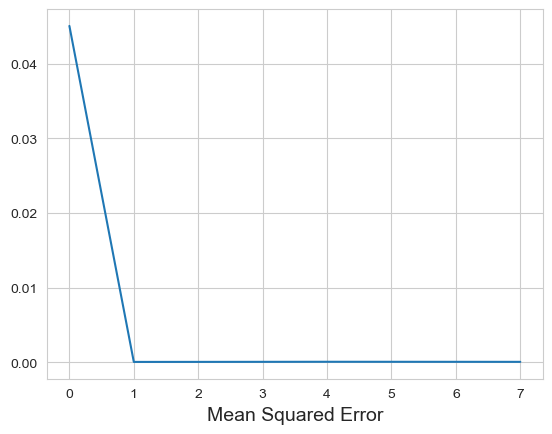

In [138]:
plt.plot(history.history['loss'])
plt.xlabel('Mean Squared Error',size=14)
plt.show();

____________________________![image.png](attachment:0a2361cd-91d8-47fc-836c-e6d0fa8c2cfc.png)

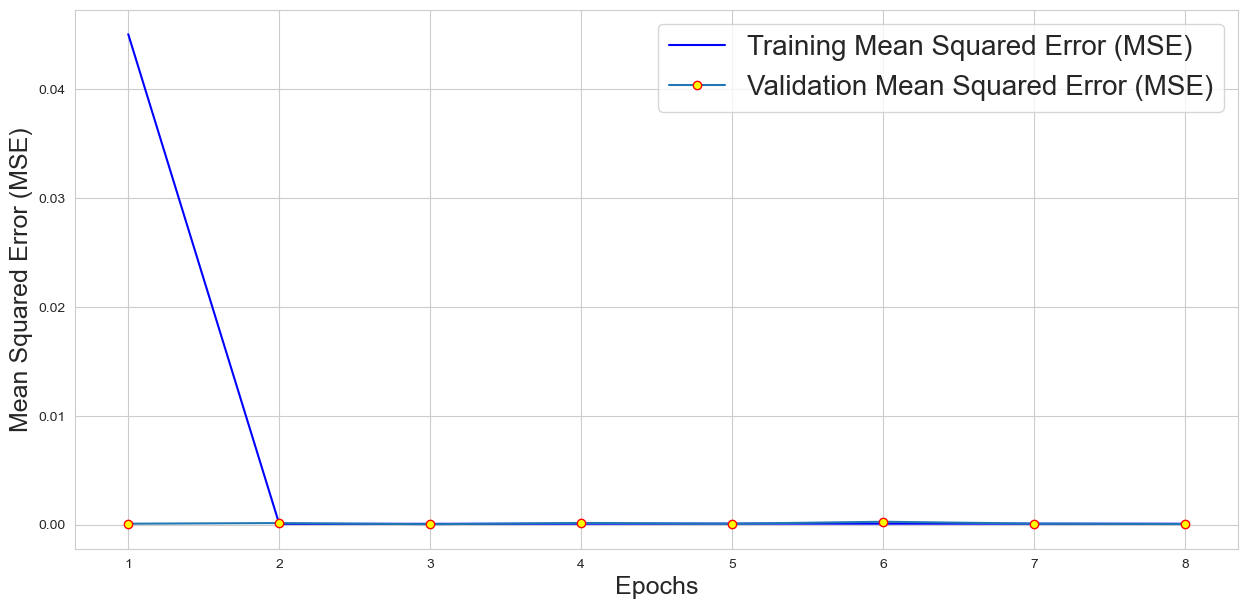

In [140]:
history_dict=history.history
mse_values=history_dict['loss']
val_mse_values=history_dict['val_loss']
epochs=range(1,len(mse_values)+1)
plt.figure(num=1,figsize=(15,7))
plt.plot(epochs,mse_values,'b',label='Training Mean Squared Error (MSE)')
plt.plot(epochs,val_mse_values,marker='o',markeredgecolor='red',markerfacecolor='yellow',label='Validation Mean Squared Error (MSE)')

plt.xlabel('Epochs', size= 18)
#plt.ylabel('count (%)')
plt.ylabel('Mean Squared Error (MSE)', size= 18)
plt.legend()
plt.show();


In [141]:
# Hint: To avoid typing the following code from scratch,
# you can copy the similar code above and modify it slightly.

________________![image.png](attachment:82020776-b3a3-4d11-8937-d1bd77bcef05.png)

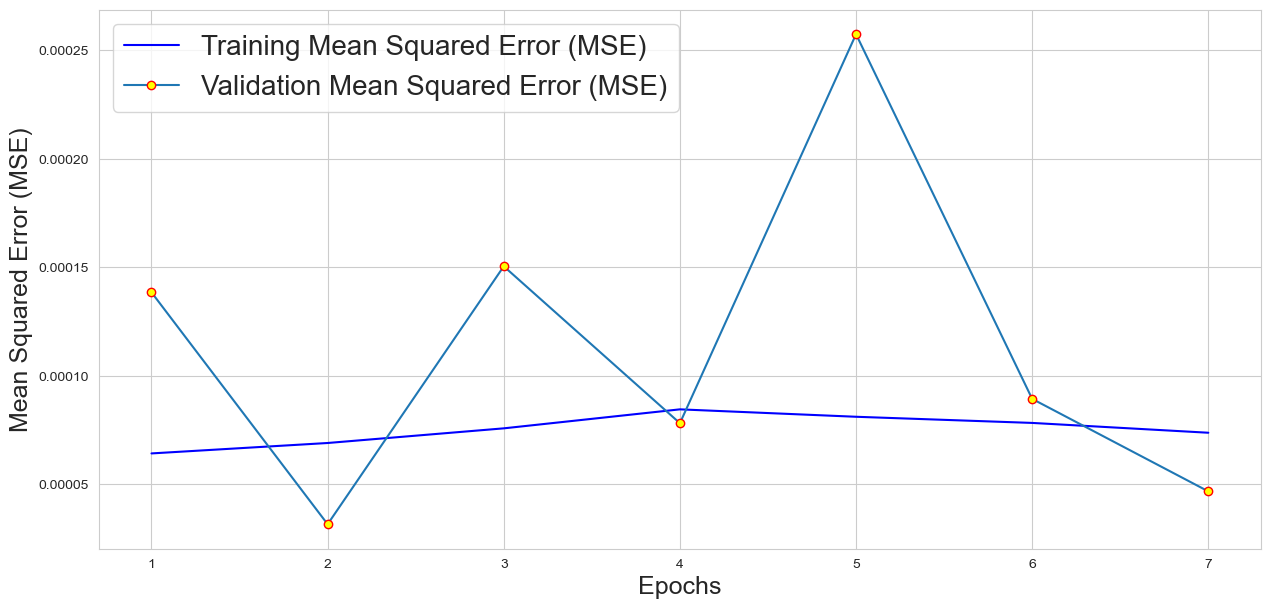

In [143]:
history_dict=history.history
mse_values=history_dict['loss'][1:]
val_mse_values=history_dict['val_loss'][1:]

epochs=range(1,len(mse_values)+1)
plt.figure(num=1,figsize=(15,7))
plt.plot(epochs,mse_values,'b',label='Training Mean Squared Error (MSE)')
plt.plot(epochs,val_mse_values,marker='o',markeredgecolor='red',markerfacecolor='yellow',label='Validation Mean Squared Error (MSE)')

plt.xlabel('Epochs', size= 18)
plt.ylabel('Mean Squared Error (MSE)', size= 18)
plt.legend()
plt.show();


#### MAE graphs during training

________________________![image.png](attachment:92a7eee3-b170-4b85-a571-3b9b764f0cd2.png)

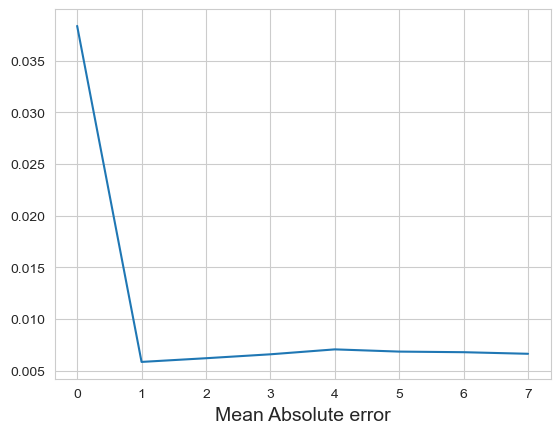

In [146]:
plt.plot(history.history['mae'])
plt.xlabel('Mean Absolute error', size=14)
plt.show()

In [147]:
# Hint: To avoid typing the following code from scratch,
# you can copy the similar code above and modify it slightly.

__________________________![image.png](attachment:2c212167-80dd-4371-baca-1030a76ec04d.png)

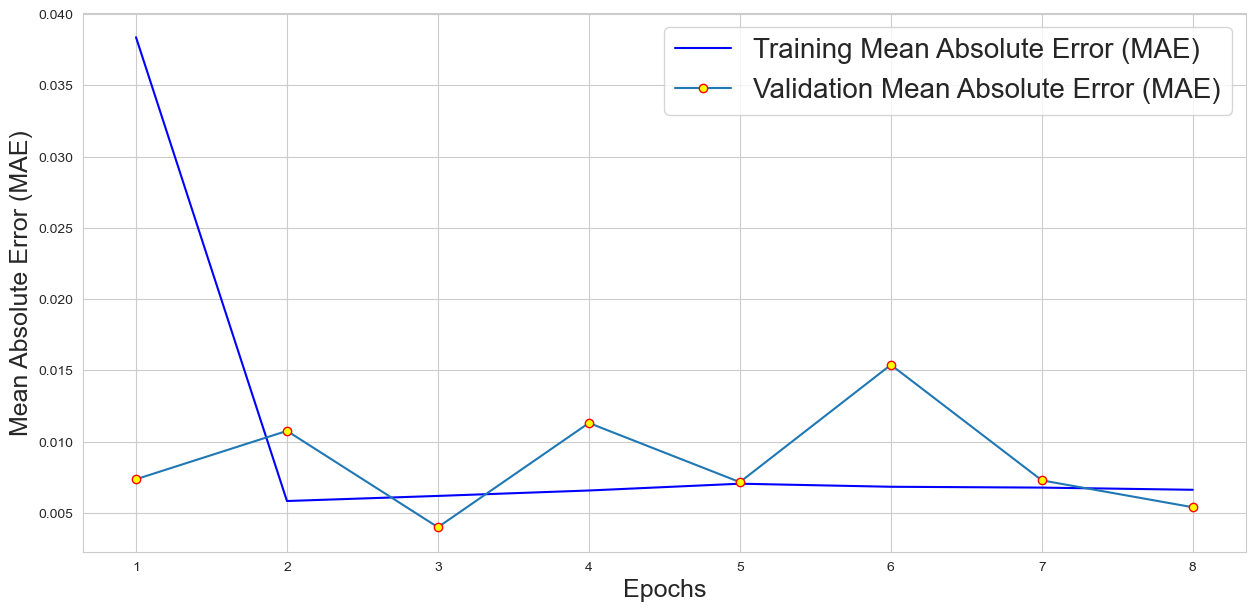

In [149]:
history_dict=history.history
mse_values=history_dict['mae']
val_mse_values=history_dict['val_mae']

epochs=range(1,len(mse_values)+1)
plt.figure(num=1,figsize=(15,7))
plt.plot(epochs,mse_values,'b',label='Training Mean Absolute Error (MAE)')
plt.plot(epochs,val_mse_values,marker='o',markeredgecolor='red',markerfacecolor='yellow',label='Validation Mean Absolute Error (MAE)')

plt.xlabel('Epochs', size= 18)
plt.ylabel('Mean Absolute Error (MAE)', size= 18)
plt.legend()
plt.show()


### prediction 25 minute ahead

____________________![image.png](attachment:73ffd6f9-49ec-4974-8d05-772edf77b107.png)

In [152]:
pred=LSTM_saved_best_model_Silver_3D(X_test)
print(pred)

tf.Tensor(
[[2.369983  2.3655696]
 [2.3711736 2.3651736]
 [2.3711727 2.365505 ]
 ...
 [2.2775075 2.273667 ]
 [2.2774158 2.273632 ]
 [2.277174  2.2733805]], shape=(3517, 2), dtype=float32)


__________________________![image.png](attachment:0c3dbf9f-b5f8-4af3-88eb-46863e18a490.png)

In [154]:
len(pred)

3517

### Price chart

________________________![image.png](attachment:b5a95cea-fdc6-4a0c-af43-9cc7e6720be8.png)

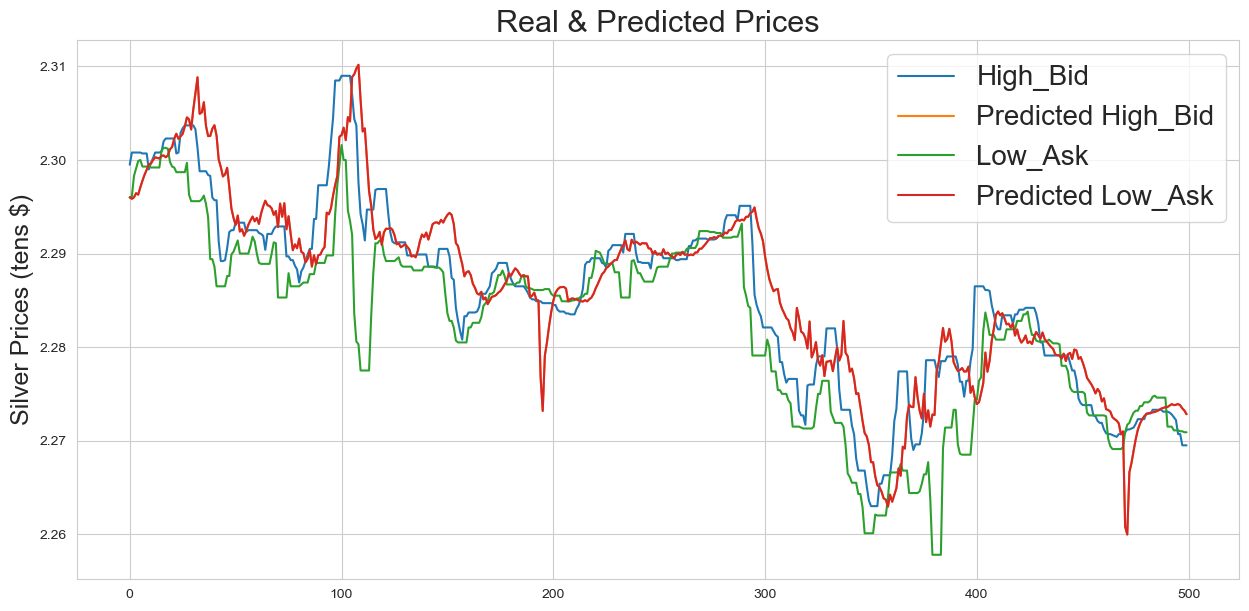

In [157]:
N1=2500
LL=500
N2=N1+LL
plt.ion()
fig=plt.figure(figsize=(15,7))
ax1=fig.add_subplot(111)
line1,=ax1.plot(y_test[N1:N2,0],label='High_Bid')
line2,=ax1.plot(pred[N1:N2,0],label='Predicted High_Bid')
line3,=ax1.plot(y_test[N1:N2,1],label='Low_Ask')
line4,=ax1.plot(pred[N1:N2,0],label='Predicted Low_Ask')

plt.title('Real & Predicted Prices',size=22)
plt.ylabel('Silver Prices (tens $)',size=18)
plt.legend(loc='upper right')
plt.show()


### Error Chart

____________________![image.png](attachment:7bf2f9cb-8f93-4c69-bd94-cfaa094365b6.png)

In [160]:
max_price=26.153
min_price=19.888
average_price=(max_price+min_price)/2

In [161]:
# Hint: To avoid typing the following code from scratch,
# you can copy the similar code above and modify it slightly.

____________________![image.png](attachment:f4784ad6-2915-40ff-acf1-dd35e76946c4.png)

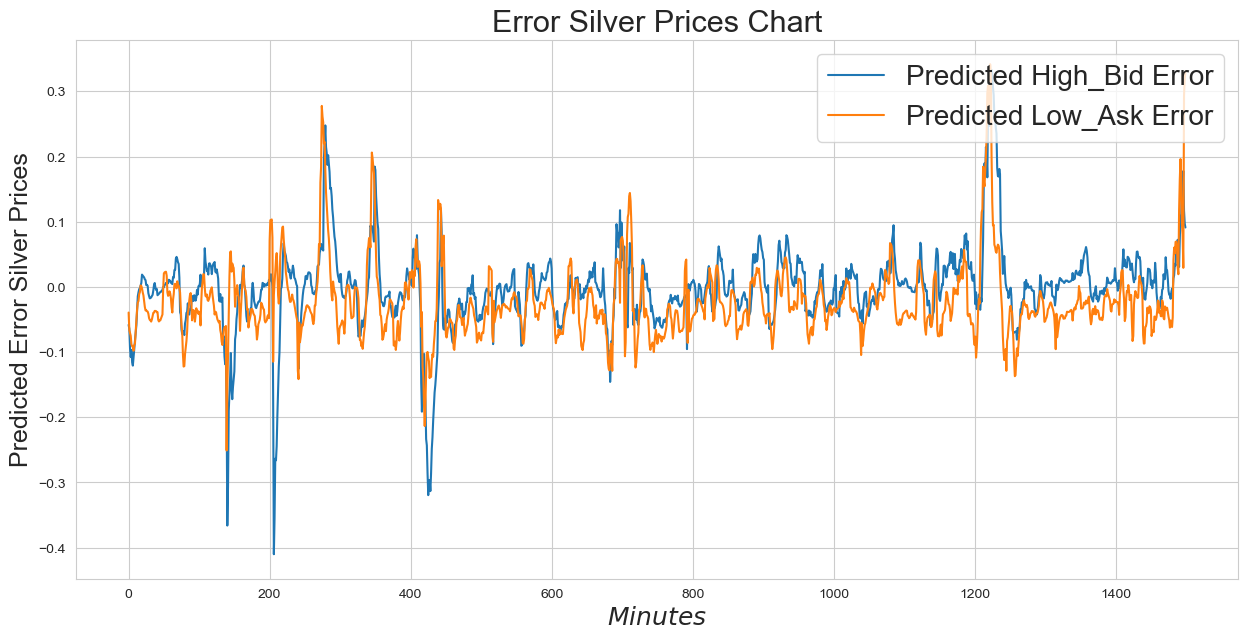

In [163]:
N1=0
LL=1500
N2=N1+LL
plt.ion()
fig=plt.figure(figsize=(15,7))
ax1=fig.add_subplot(111)

a=(pred[N1:N2,0]-y_test[N1:N2,0])*10
b=(pred[N1:N2,1]-y_test[N1:N2,1])*10

line1,=ax1.plot(a,label='Predicted High_Bid Error')
line2,=ax1.plot(b,label='Predicted Low_Ask Error')

plt.title('Error Silver Prices Chart',size=22)
plt.ylabel('Predicted Error Silver Prices',size=18)
plt.xlabel('$Minutes$',size=18)
plt.legend(loc='upper right')
plt.show()


# Lab Logbook Requirement:

<html> <h3 style="font-style:italic; color:blue;">
   
1) Modify the practical session LSTM model parameter from 100 to be calculated using the formula:

   ZY + 10
   , where your SID is: XXXXXZY
   
3) Change the epochs to 10
4) Change the patience to 5
5) Leave other parameters the same as in the practical session.
6) Compile the model.
6) Train your LSTM with the same datasets and demonstrate the received test MSE & MAE.
Compare your test MSE & MAE with the MSE & MAE of the LSTM in the practical session.
7) Please only add to your Lab Logbook print-screens of:
- your LSTM architecture using model.summary()
- code and training result using model.fit()
- the resulting test MSE & MAE and
- MAE detailed graph.
    
</h3> </html>

<html> <h3 style="color:red;">
NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.
</h3> </html>